# Project 4 - Linear Regression

### Objective

To analyze the data and build a linear regression model to predict the charges in insurance data.



### Data Description

**Data Dictionary**


**age**: age of primary beneficiary

**gender**: insurance contractor gender, female, male

**bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

**children**: Number of children covered by health insurance / Number of dependents

**smoker**: Smoking

**region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

**charges**: Individual medical costs billed by health insurance


## Import necessary libraries

In [267]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Load the dataset

In [269]:
df_insurance = pd.read_csv('/Users/devadharshini/Desktop/5302-Notes/insurance_data.csv')
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Data Overview

### Display the first five rows of the dataset

In [271]:
df_insurance.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Check the shape of the dataset

In [273]:
#print(f'The dataset contains {df_foodhub.shape[0]} rows and {df_foodhub.shape[1]} columns')
df_insurance.shape

(1338, 7)

### Create a copy of your dataset call df_copy

In [275]:
df_copy = df_insurance.copy()

### Check the data types of the columns for the dataset and write your observations

In [277]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The features age,bmi,children and charges are numerical.
The features gender,smoker and region are of datatype object and they are categorical.

### Check for duplicate values and write your observations

In [279]:
duplicate_count = df_copy.duplicated().sum()
print(f'The total number of duplicated rows: {duplicate_count}')
#Gives all the duplicated rows
duplicates = df_copy[df_copy.duplicated()]
print(duplicates)



The total number of duplicated rows: 1
     age gender    bmi  children smoker     region    charges
581   19   male  30.59         0     no  northwest  1639.5631


As we can see in the above output, we have one that is duplicated in the given dataset. We can drop this particular row.

### Check the statistical summary and write your observations

In [281]:
summary = df_copy.describe()
print(summary)

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


Observation from summary:
    The total count is 1338 in all the columns which denotes there are no missing values in these columns.
1. Age:
       People are in the age group from 18 to 64.
       The mean and median are around 39 , which indicates a normal distribution.
       Standard deviation of 14 indicates a wide spread.
 
2. BMI:
       BMI ranges from 15.96 - 53.13.
       Mean and Median values are almost same (around 30) , which indicates a normal distribution.

3. Children:
      The count of children are between 0 and 5.
      Almost 50% of the people has  single child or less.

4. Charges:
      The median ($9,382)is lesser than the mean indicating a right-skewed distribution.
      Mean is $13,270, with a very high standard deviation ($12,110) which shows a lot of variability.
    

                                        
   


### Check the unique values in each of the columns and write your observations

In [283]:
unique_values = {col: df_copy[col].unique() for col in df_copy.columns}
print(unique_values)

{'age': array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39]), 'gender': array(['female', 'male'], dtype=object), 'bmi': array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 

Observations:

-> Gender category has two values: Female and Male.
-> Region column has four categories: southwest,southeast,northwest,northeast.
-> Charges has a wide spread of values ranging from around 16,000 to 30,000.
-> Age ranges from 18 - 64 .
-> Children category ranges from no child to upto 5 children.

### Check the missing values and impute/drop the missing values whichever is relevant

In [285]:
print(df_copy.isnull().sum())
#df_copy.head()
region_mapping = {
    "northeast": 0,
    "northwest": 1,
    "southeast": 2,
    "southwest": 3
}
df_copy["region"] = df_copy["region"].map(region_mapping)
df_copy = pd.get_dummies(df_copy,drop_first= True) 

# Convert boolean columns to integer 
df_copy[['gender_male']] = df_copy[['gender_male']].astype(int)
df_copy[['smoker_yes']] = df_copy[['smoker_yes']].astype(int)

df_copy.head()


age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


,age,bmi,children,region,charges,gender_male,smoker_yes
0,19,27.900,0,3,16884.92400,0,1
1,18,33.770,1,2,1725.55230,1,0
2,28,33.000,3,2,4449.46200,1,0
3,33,22.705,0,1,21984.47061,1,0
4,32,28.880,0,1,3866.85520,1,0


There is no missing values in the dataset given. However, the categorical columns gender,smoker and region needs encoding. I have done it in the above code.

### Calculate Variance Inflation Factor (VIF) and write your observations 

In [287]:

X = df_copy[["age","bmi","children","charges","gender_male","smoker_yes"]]
X = sm.add_constant(X)
# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display results
print(vif_data)

       Feature        VIF
0        const  36.824374
1          age   1.372390
2          bmi   1.119867
3     children   1.011153
4      charges   3.995565
5  gender_male   1.008991
6   smoker_yes   3.526459


Observations from VIF result:
    
    We use VIF to detect multicollinearity among features.
    
-> The features age,bmi,children,gender has a VIF value of 1 which indicates there is multicollinearity.
-> The features charges, smoker has a VIF value around 3.5, which indicates a moderate correlation. However, VIF > 5 indicates a potential multicollinearity concern.


## <a name='link2'>Exploratory Data Analysis (EDA)</a>


### For each feature below, create a histogram and box plot. On the histogram draw a line that shows mean and median value for each variable.

### age

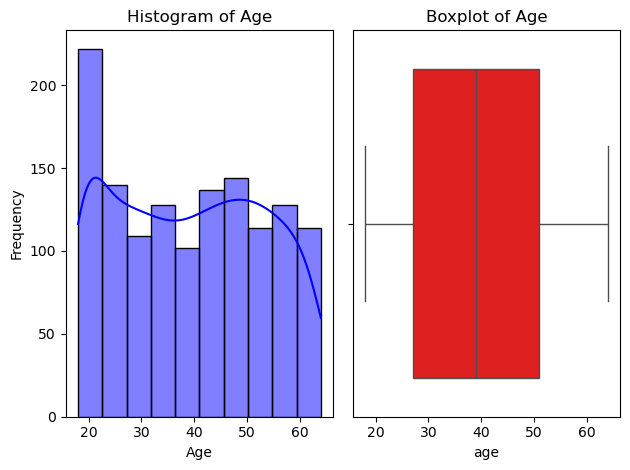

In [289]:
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_copy['age'], bins=10, kde=True, color='blue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df_copy['age'], color='red')
plt.title('Boxplot of Age')

plt.tight_layout()
plt.show()

### bmi

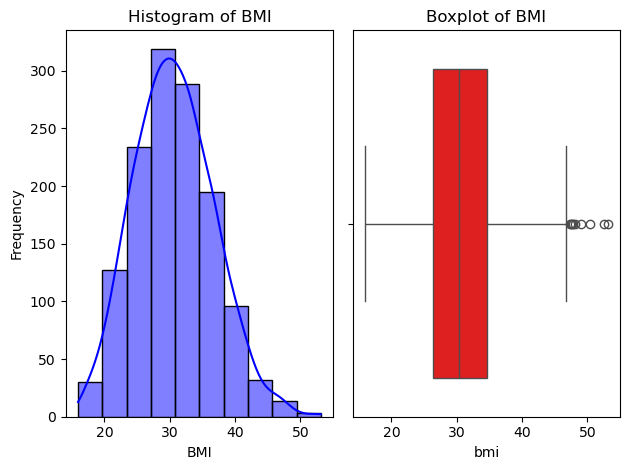

In [291]:
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_copy['bmi'], bins=10, kde=True, color='blue')
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df_copy['bmi'], color='red')
plt.title('Boxplot of BMI')

# Show the plots
plt.tight_layout()
plt.show()

### children

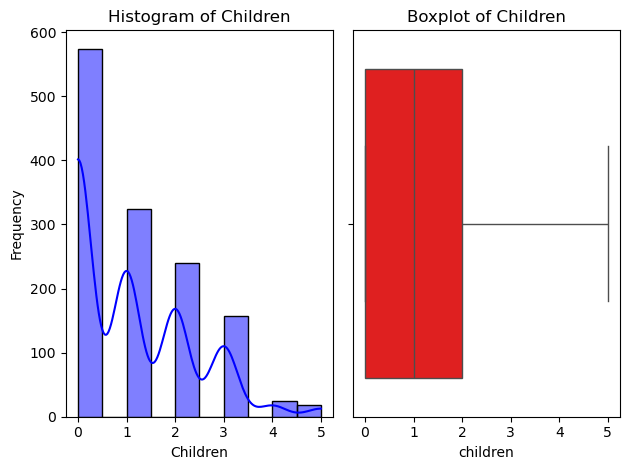

In [293]:
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_copy['children'], bins=10, kde=True, color='blue')
plt.title('Histogram of Children')
plt.xlabel('Children')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df_copy['children'], color='red')
plt.title('Boxplot of Children')

# Show the plots
plt.tight_layout()
plt.show()

### Create a pairwise scatter plot and write your observations. Check relationship between dependent and independent variables. Draw a trendline for each scatter plot.

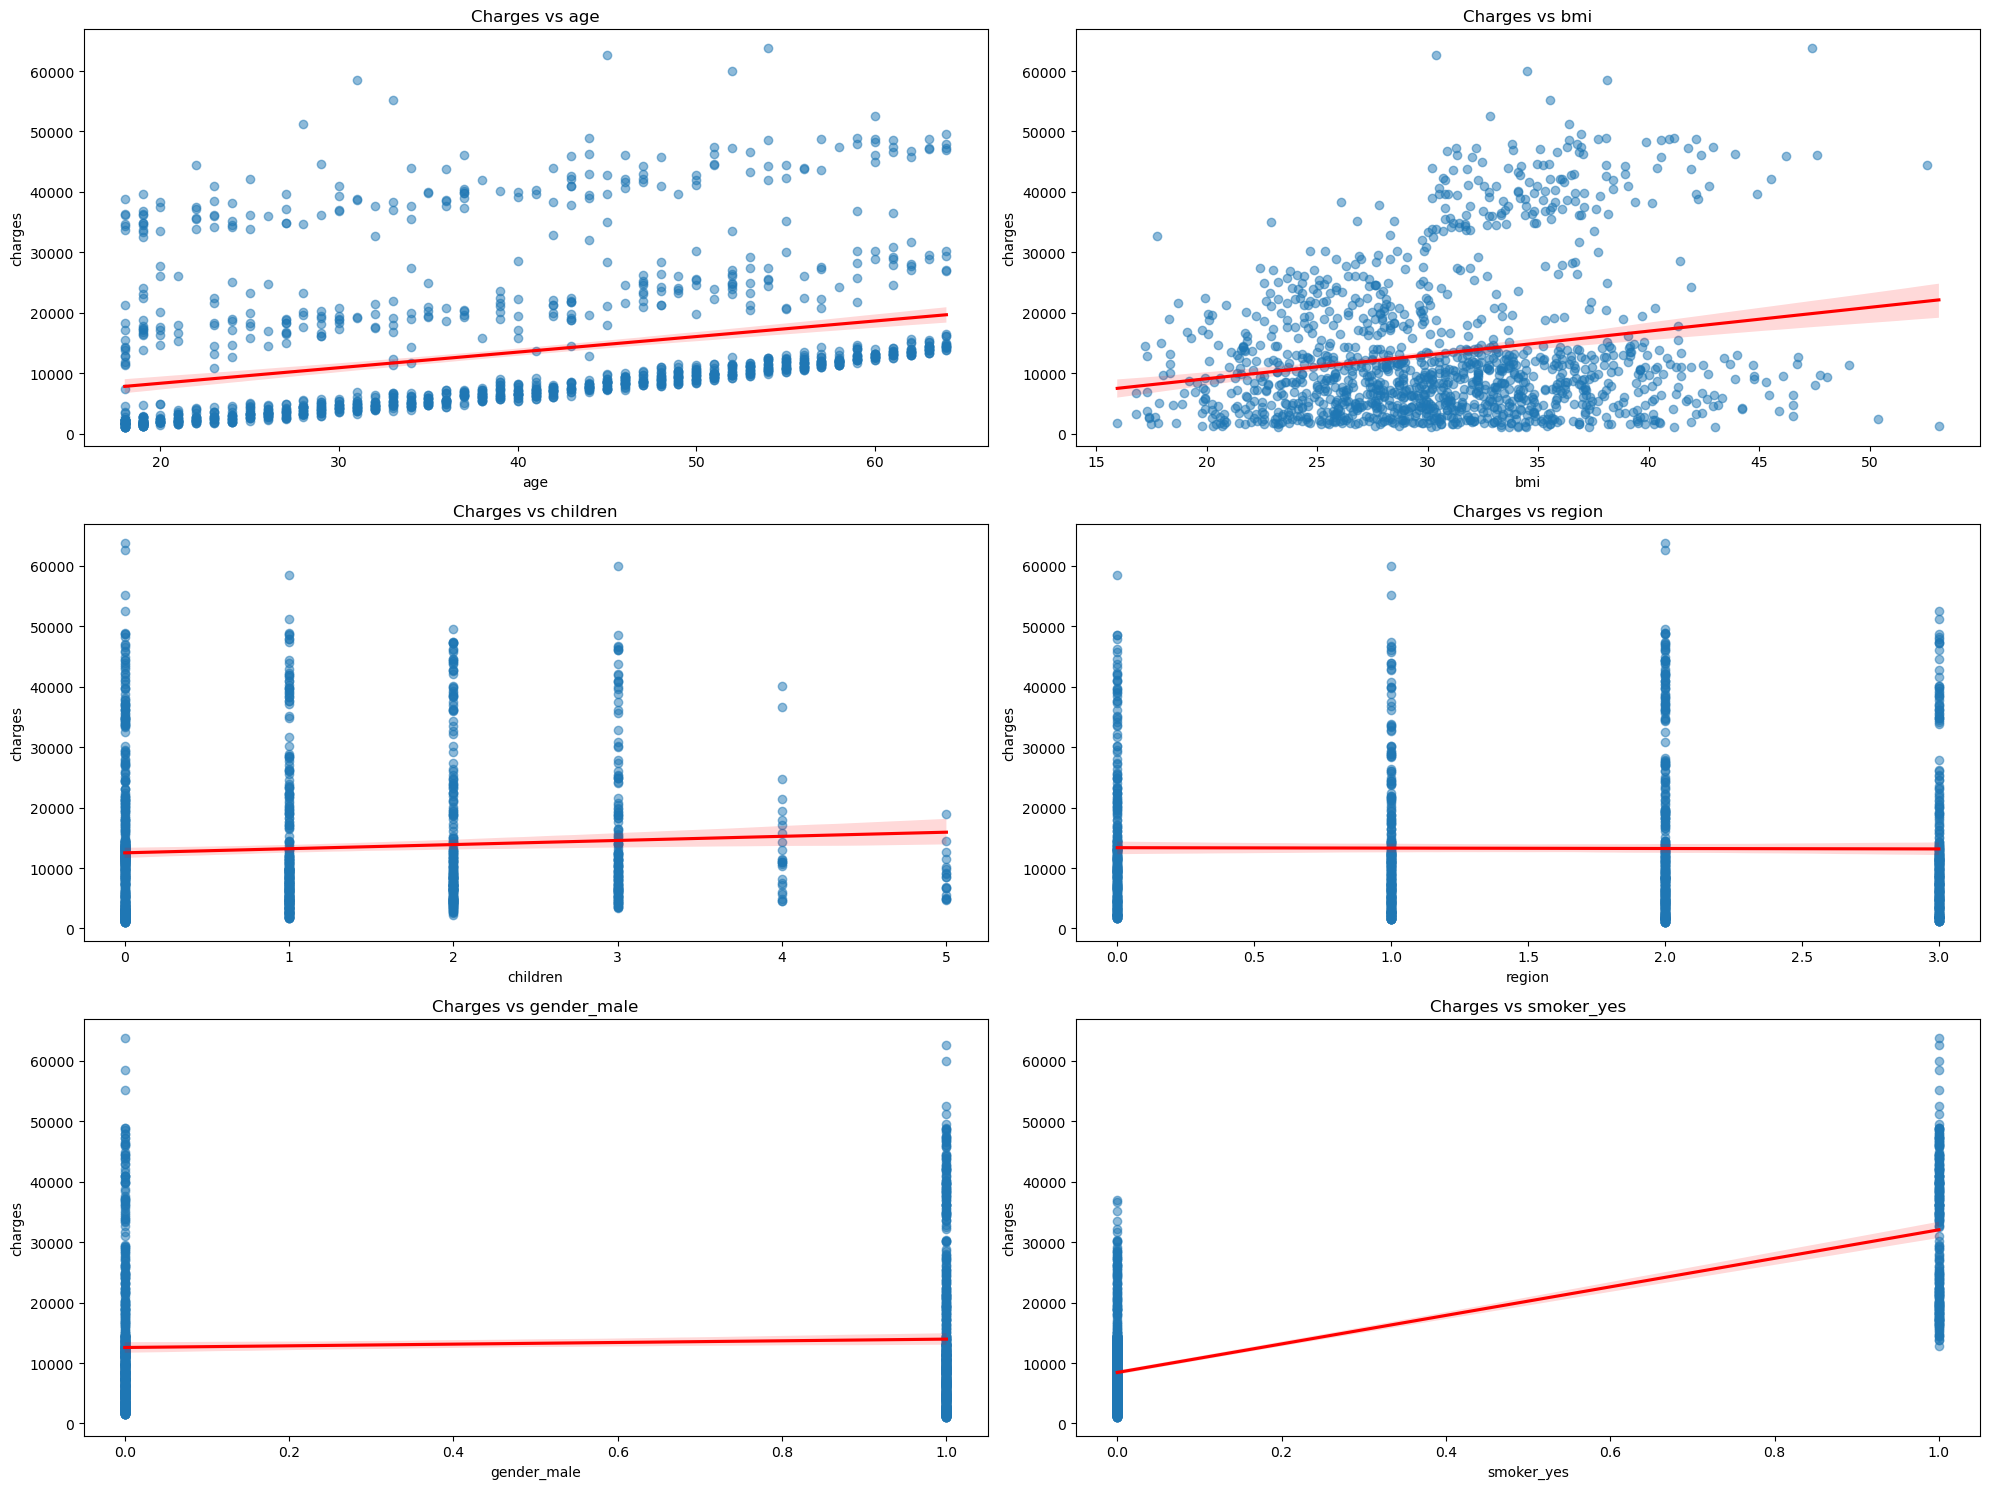

In [295]:


# List of independent variables
independent_vars = ['age', 'bmi', 'children', 'region', 'gender_male', 'smoker_yes']

# Set up plot grid
plt.figure(figsize=(20, 15))
for i, col in enumerate(independent_vars):
    plt.subplot(3, 2, i + 1)
    sns.regplot(x=df_copy[col], y=df_copy['charges'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f'Charges vs {col}')
plt.tight_layout()
plt.show()

1. Age vs Charges
Positive linear trend — as age increases, insurance charges generally increase.

Older individuals may be more prone to health issues, leading to higher costs.

2. BMI vs Charges
Slight positive trend, but not strong.

Outliers at high BMI levels with very high charges — possibly due to smokers or health complications.

3. Children vs Charges
No clear linear pattern.

Charges vary regardless of the number of children.

Possibly not a strong predictor on its own.

4. Region vs Charges
Region is likely encoded as numeric, but it's categorical.

No meaningful trend here — should be treated as a categorical variable in modeling.

5. Gender (male) vs Charges
Very little to no trend.

Charges are relatively similar for both genders.

Gender might not be an important variable.

6. Smoker (yes) vs Charges
Strong positive jump — Smokers have much higher charges.

This variable likely has the highest predictive power.

### Create a heatmap to check which variables are highly correlated to each other. Drop the variables if the correlation coeefficent shows high correlation

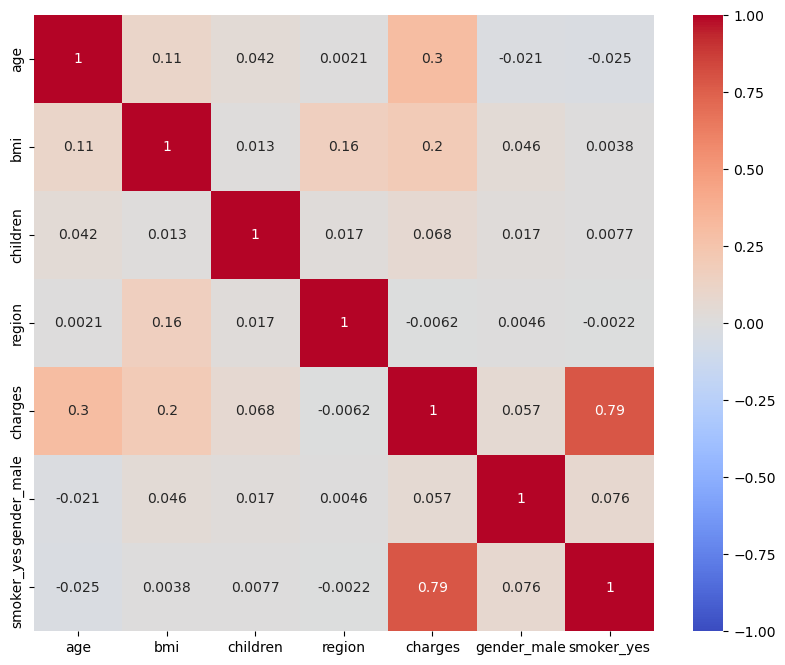

In [297]:
#heatmap plot to visualize the correlation matrix.
plt.figure(figsize=(10, 8))
plt.tight_layout()
sns.heatmap(df_copy.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))


Observations:
-> The charges and region are negatively correlated.
-> Smoker and charger have a high correlation of 0.79.
->

Observations:

-> The charges and region are negatively correlated.
-> Smoker and charger have a high correlation of 0.79.
-> The smoker and region have a negative correlation.

## Linear Regression Model Building

### Define independent and dependent variables

In [299]:

# independant variables
df_copy.info()
X = df_copy.drop(['charges'], axis=1)

# dependent variable
y = df_copy[['charges']]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   bmi          1338 non-null   float64
 2   children     1338 non-null   int64  
 3   region       1338 non-null   int64  
 4   charges      1338 non-null   float64
 5   gender_male  1338 non-null   int64  
 6   smoker_yes   1338 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


### Create dummy variables

In [301]:
#Please refer section 1.3.8 - done this as part of that

### Split the data into train and test

In [303]:
from sklearn.model_selection import train_test_split



# Perform an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 1070
Testing set size: 268


### Fit a multiple linear regression by using all variables in the dataset.

In [305]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

### Display regression coefficients and write your observations.

In [307]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for age is 252.84724461511567
The coefficient for bmi is 322.4666877192531
The coefficient for children is 441.45833769665484
The coefficient for region is -254.6217725859164
The coefficient for gender_male is -95.65241636066524
The coefficient for smoker_yes is 23500.78802438788


Observations:
Age - For each additional year of age, charges increase by ~$253, holding all other variables constant.
BMI - For each one unit increase in BMI, charges increase by ~$322, assuming other factors remain the same.
Children - Each additional child leads to an increase of ~$441 in insurance charges, all else equal.
Gender - Being male is associated with ~$96 lower charges compared to females, holding other variables constant.
Smoker - Smokers pay ~$23,500 more than non-smokers on average, holding all else constant.

### Model performance check and write your observations - Calcute R^2 and MSE.


In [309]:

#train = regression_model.score(X_train, y_train)

#test = regression_model.score(X_test, y_test)
from sklearn.metrics import r2_score, mean_squared_error

# Make predictions
y_pred = regression_model.predict(X_test)

# Calculate R^2 and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")



R² Score: 0.7866
Mean Squared Error: 34204243.68


About 78.66% of the variance in medical charges is explained by the model.
Your model explains 78.66% of the variance in medical insurance charges.This is a strong fit but still there's ~21.34% of variance unexplained.

 MSE:
 The average squared difference between actual and predicted values is over 34,204,243.68.

It's a large number because charges themselves can be very high (up to $63,000 in your data).This number alone is hard to interpret unless we compare it to the scale of the target variable(Need to convert charge and calculate RMSE for better understanding).

### Write your Conclusions


The  linear regression model built to predict insurance charges based on variables such as age, BMI, number of children, gender, smoking status, and region demonstrates a reasonably strong performance with 78.66% of variance.

### Check Linear Regression assumptions

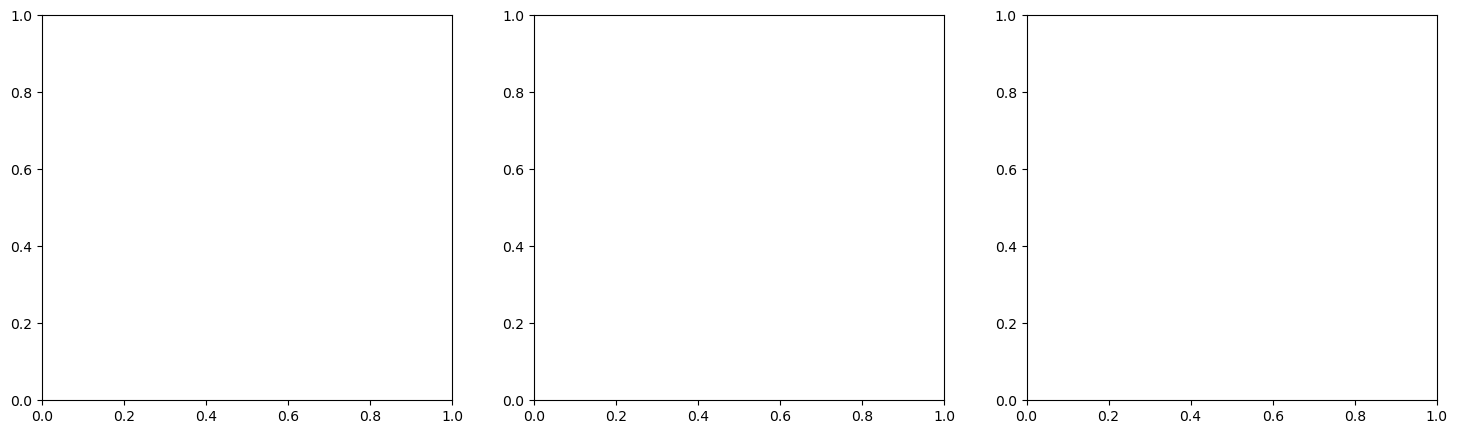

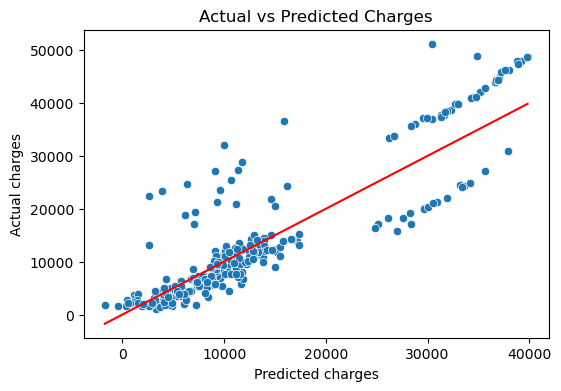

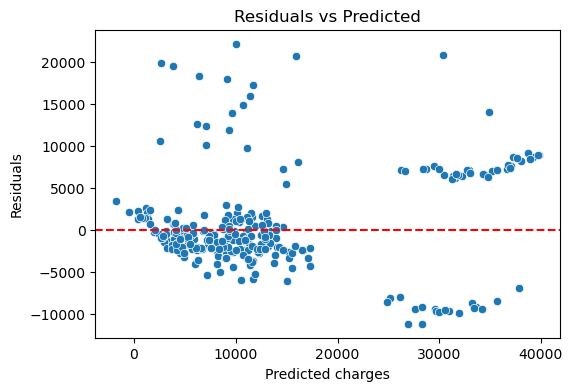

In [311]:
#Linearity
# Residuals
y_pred = regression_model.predict(X_test)
residuals = y_test.values.flatten() - y_pred.flatten()

# Actual vs Predicted
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred.flatten(), y=y_test.values.flatten())
plt.xlabel("Predicted charges")
plt.ylabel("Actual charges")
plt.title("Actual vs Predicted Charges")
plt.plot([min(y_pred), max(y_pred)], [min(y_pred), max(y_pred)], color='red')
plt.show()

# Residuals vs Predicted
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred.flatten(), y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted charges")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

Observations:
There seems to be some pattern , especially for high predicted values.This may suggest non-linearity or that the model is not capturing interactions or higher-order terms well.

There's also more spread in residuals for larger predictions, indicating heteroscedasticity, which violates one of the linear regression assumptions.

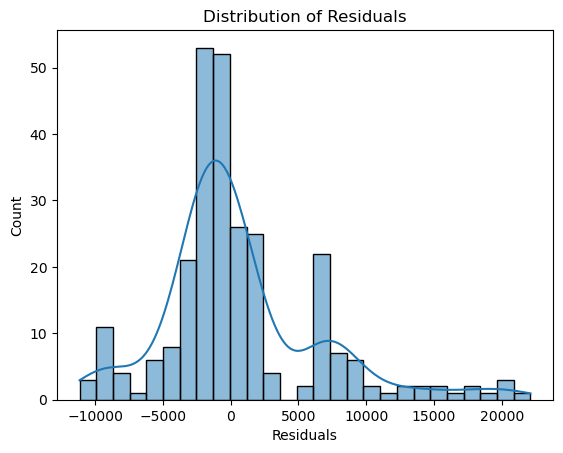

In [313]:
#Normality of residuals
#import scipy.stats as stats

# Histogram
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()

Linear regression assumes that residuals should be normally distributed.

But, this plot deviates from a normal bell-shaped curve, especially with that right tail, indicating a violation of normality.

No Multicollinearity:
    The VFI analysis, which we have done earlier and the results shows there is no multicollinearity among the features.